# ASSIGNMENT 8: Autoencoders

Pawan Kumar : 224230                        
Raj Rajeshwari Prasad: 224237                           
Sesha Sai Kiran Bhavaraju: 224160

## 1. Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from pylab import rcParams
from matplotlib import cm
from IPython.display import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from keras.datasets import cifar10,fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import MaxPool2D, UpSampling2D,Conv2DTranspose,Conv2D,Convolution2D


%tensorflow_version 2.x

Using TensorFlow backend.


## 2. Loading Datasets

### 2.1 Load Fashion MNIST Data

In [2]:
# Loading Data
(train_imgs,train_lbls), (test_imgs, test_lbls) = fashion_mnist.load_data()

# Flattening and Normalizing Data
no_of_train_imgs = train_imgs.shape[0]
no_of_test_imgs  = test_imgs.shape[0]
train_imgs_trans = train_imgs.reshape(train_imgs.shape[1]*train_imgs.shape[2], no_of_train_imgs).T
test_imgs_trans  = test_imgs.reshape(test_imgs.shape[1]*test_imgs.shape[2], no_of_test_imgs).T

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
print('Train_images shape : {}'.format(train_imgs_trans.shape))
print('Test_images shape  : {}'.format(test_imgs_trans.shape))

Train_images shape : (60000, 784)
Test_images shape  : (10000, 784)


In [0]:
train_imgs_trans = train_imgs_trans.astype('float32')/255
test_imgs_trans  = test_imgs_trans.astype('float32')/255

### 2.2 Load CIFAR10 Data

In [5]:
Cifar  = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = Cifar.load_data()
train_images = train_images.reshape([-1, 32, 32, 3]).astype(np.float32) / 255
train_labels = train_labels.reshape((-1,)).astype(np.int32)
print('Total Number of Training Images : {}'.format(train_images.shape))
train_images1, validation_images1 = train_test_split(train_images, test_size=0.996)
train_labels1 , validation_labels1 = train_test_split(train_labels, test_size=0.996)
print('Subset of Training Images       : {}'.format(train_images1.shape))
print('Number of validation set        : {}'.format(validation_images1.shape))

170500096/170498071 [==============================] - 2s 0us/step
Total Number of Training Images : (50000, 32, 32, 3)
Subset of Training Images       : (200, 32, 32, 3)
Number of validation set        : (49800, 32, 32, 3)


## 3. MLP Based Autoencoder

### 3.1 Building the Encoder

In [0]:
input_shape= Input(shape=(784,))

In [0]:
def mlp_encoder(activation_func,input_shape):
  #global input_shape
  mlp_encoder1 = Dense(512, activation=activation_func)(input_shape)
  mlp_encoder2 = Dense(256, activation=activation_func)(mlp_encoder1)
  mlp_encoder3 = Dense(128, activation=activation_func)(mlp_encoder2)
  mlp_encoder4 = Dense(64, activation=activation_func)(mlp_encoder3)
  mlp_encoder5 = Dense(32, activation=activation_func)(mlp_encoder4)
  mlp_encoder6 = Dense(16, activation=activation_func)(mlp_encoder5)
  return (mlp_encoder6)

### 3.2 Building the Decoder

In [0]:
def mlp_decoder(activation_func,encoder_output):
  global input_shape
  mlp_decoder1 = Dense(32, activation=activation_func)(encoder_output)
  mlp_decoder2 = Dense(64, activation=activation_func)(mlp_decoder1)
  mlp_decoder3 = Dense(128, activation=activation_func)(mlp_decoder2)
  mlp_decoder4 = Dense(256, activation=activation_func)(mlp_decoder3)
  mlp_decoder5 = Dense(512, activation=activation_func)(mlp_decoder4)
  mlp_decoder6 = Dense(784, activation=activation_func)(mlp_decoder5)
  return (mlp_decoder6)

### 3.3 Building Autoencoder

In [0]:
encoder_output = mlp_encoder(activation_func='sigmoid', input_shape=input_shape)
decoder_output = mlp_decoder(activation_func='sigmoid', encoder_output=encoder_output)

In [0]:
autoencoder = Model(inputs=input_shape, outputs = decoder_output)

In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [12]:
autoencoder.fit(train_imgs_trans, train_imgs_trans,
                epochs=100,
                batch_size=1000,
                shuffle=True,
                validation_data=(test_imgs_trans, test_imgs_trans))

Epoch 1/100
60/60 [==============================] - 1s 19ms/step - loss: 0.6036 - val_loss: 0.6000
Epoch 2/100
60/60 [==============================] - 1s 14ms/step - loss: 0.5981 - val_loss: 0.6000
Epoch 3/100
60/60 [==============================] - 1s 13ms/step - loss: 0.5982 - val_loss: 0.6000
Epoch 4/100
60/60 [==============================] - 1s 14ms/step - loss: 0.5982 - val_loss: 0.6000
Epoch 5/100
60/60 [==============================] - 1s 14ms/step - loss: 0.5982 - val_loss: 0.5999
Epoch 6/100
60/60 [==============================] - 1s 13ms/step - loss: 0.5982 - val_loss: 0.6000
Epoch 7/100
60/60 [==============================] - 1s 14ms/step - loss: 0.5982 - val_loss: 0.6000
Epoch 8/100
60/60 [==============================] - 1s 14ms/step - loss: 0.5982 - val_loss: 0.5999
Epoch 9/100
60/60 [==============================] - 1s 13ms/step - loss: 0.5982 - val_loss: 0.5999
Epoch 10/100
60/60 [==============================] - 1s 13ms/step - loss: 0.5982 - val_loss: 0.6000

### 3.4 Reconstruction of Images

In [0]:
#create encoder model
encoder = Model(inputs = input_shape, outputs = encoder_output)
#create decoder model
encoded_input = Input(shape=(16,))
decoder_layer1 = autoencoder.layers[-6]
decoder_layer2 = autoencoder.layers[-5]
decoder_layer3 = autoencoder.layers[-4]
decoder_layer4 = autoencoder.layers[-3]
decoder_layer5 = autoencoder.layers[-2]
decoder_layer6 = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=(decoder_layer6(decoder_layer5(decoder_layer4(decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))))))

In [0]:
# get latent vector for visualization
latent_vector = encoder.predict(test_imgs_trans)
# get decoder output to visualize reconstructed image
reconstructed_imgs = decoder.predict(latent_vector)

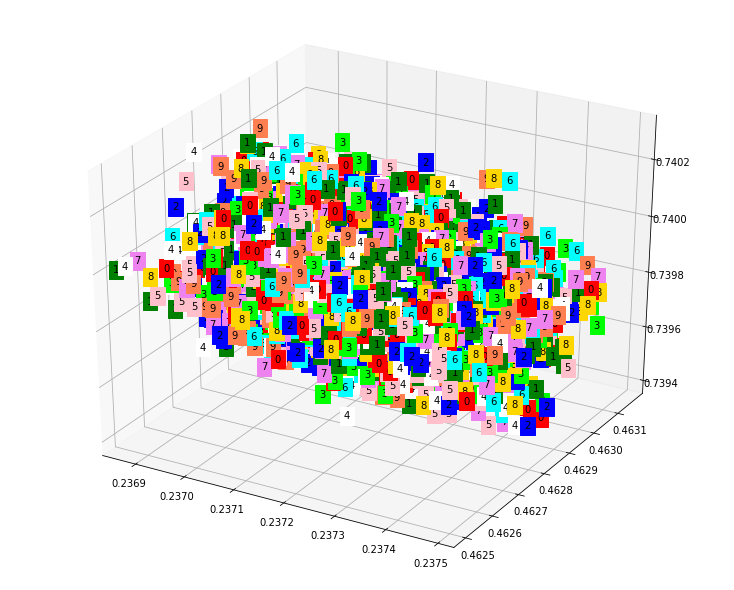

In [15]:
# visualize in 3D plot
rcParams['figure.figsize'] = 10, 8

fig = plt.figure(1)
ax = Axes3D(fig)

xs = latent_vector[:, 0]
ys = latent_vector[:, 1]
zs = latent_vector[:, 2]

color=['red','green','blue','lime','white','pink','aqua','violet','gold','coral']

for x, y, z, label in zip(xs, ys, zs, test_lbls):
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor=c)
    
ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())

plt.show()

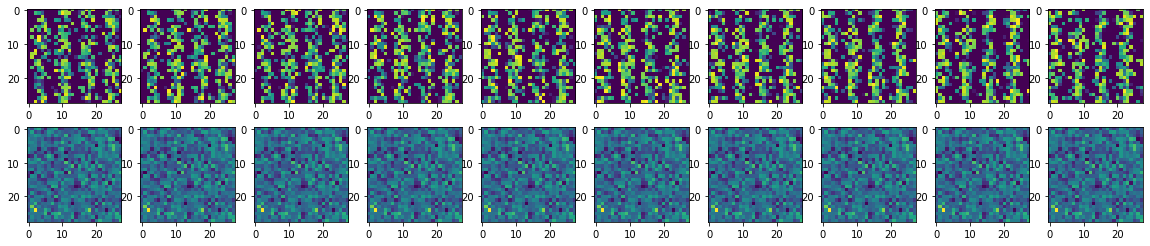

In [16]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_imgs_trans[i].reshape(28, 28))
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)

    # display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
plt.show()

## 4. CNN Based Autoencoder

### 4.1 Building CNN Encoder

In [0]:
input = Input((32,32,3),name='input')

cnn_encoder1 = Convolution2D(32 , kernel_size=(3,3),padding='same',activation='relu', name='conv_1')(input)
cnn_encoder1 = MaxPool2D((2, 2))(cnn_encoder1)
cnn_encoder2 = Convolution2D(16 , kernel_size=(3,3),padding='same',activation='relu',name= 'conv_2')(cnn_encoder1)
cnn_encoder2 = MaxPool2D((2, 2))(cnn_encoder2)
cnn_encoder3 = Convolution2D( 8, kernel_size=(3,3),padding='same',activation='relu', name= 'conv_3')(cnn_encoder2)

### 4.2 Building CNN Decoder

In [0]:
cnn_decoder1 = Conv2DTranspose(8 , kernel_size=(3,3),padding='same',activation='sigmoid', name= 'conv_4')(cnn_encoder3)
cnn_decoder1 = UpSampling2D((2, 2))(cnn_decoder1)
cnn_decoder2 = Conv2DTranspose(16 , kernel_size=(3,3),padding='same',activation='sigmoid', name= 'conv_5')(cnn_decoder1)
cnn_decoder2 = UpSampling2D((2, 2))(cnn_decoder2)
cnn_decoder3 = Conv2DTranspose(32 , kernel_size=(3,3),padding='same',activation='sigmoid', name= 'conv_6')(cnn_decoder2)

### 4.3 CNN Autoencoder

In [19]:
decoded  = Conv2D(3, (3, 3), padding='same', activation='sigmoid')(cnn_decoder3)


ae = Model(input , outputs = decoded , name = 'CAE')
ae.compile(optimizer = 'adam', loss = 'binary_crossentropy')
ae.summary()

Model: "CAE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 16, 16, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 8, 8, 8)           1160      
_________________________________________________________________
conv_4 (Conv2DTranspose)     (None, 8, 8, 8)           584     

In [20]:
ae.fit(validation_images1,validation_images1,batch_size=50, epochs=4)

Epoch 1/4
996/996 [==============================] - 11s 11ms/step - loss: 0.5980
Epoch 2/4
996/996 [==============================] - 11s 11ms/step - loss: 0.5788
Epoch 3/4
996/996 [==============================] - 11s 11ms/step - loss: 0.5695
Epoch 4/4
996/996 [==============================] - 11s 11ms/step - loss: 0.5665


### 4.4 Reconstructing Images

In [0]:
num_reconstructions = 10
samples = train_images1[:num_reconstructions]
targets = train_labels1[:num_reconstructions]
reconstructions = ae.predict(samples)

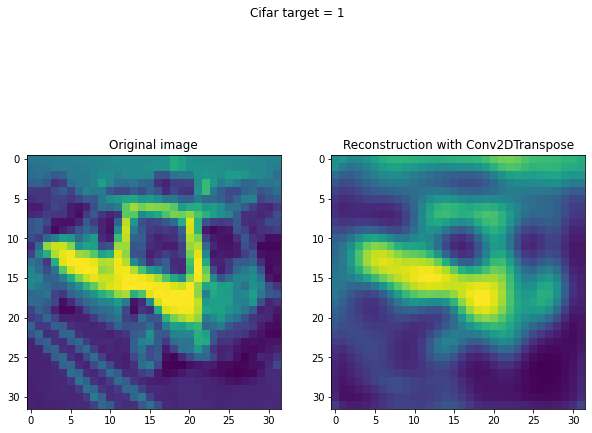

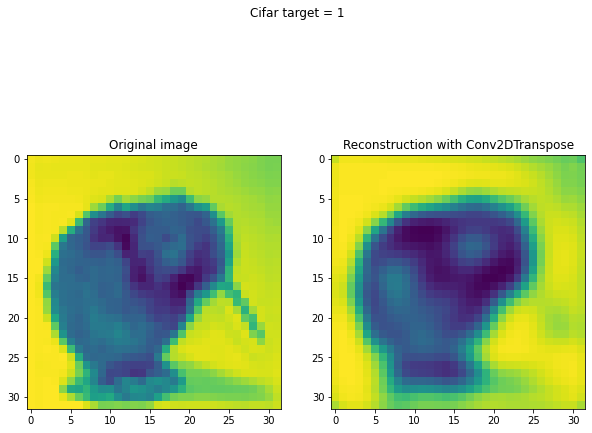

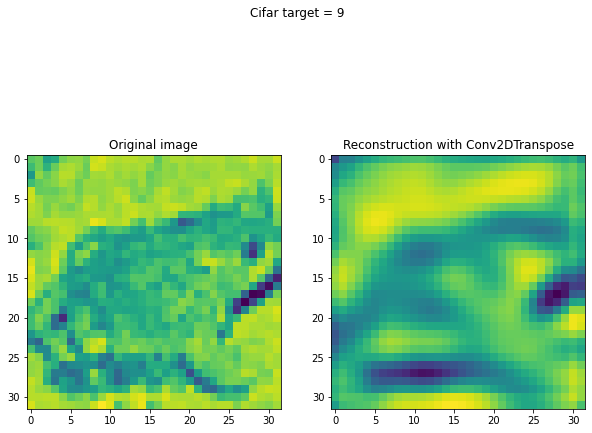

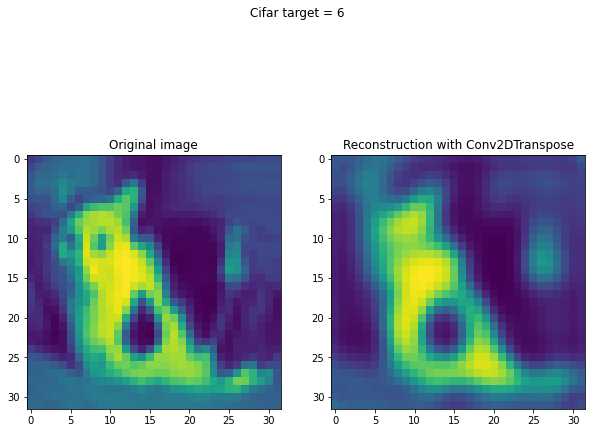

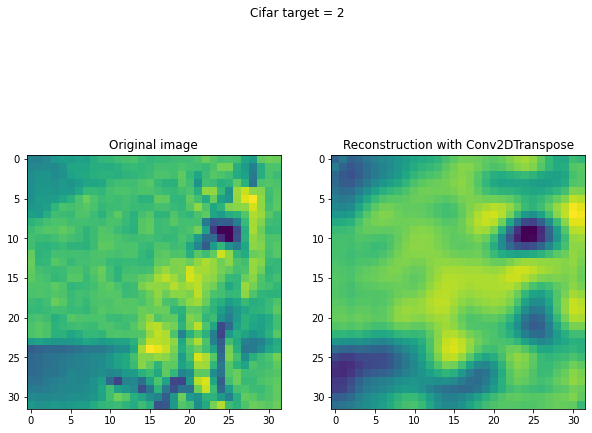

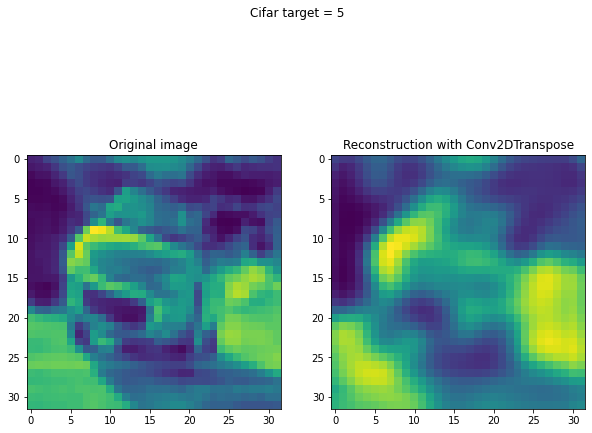

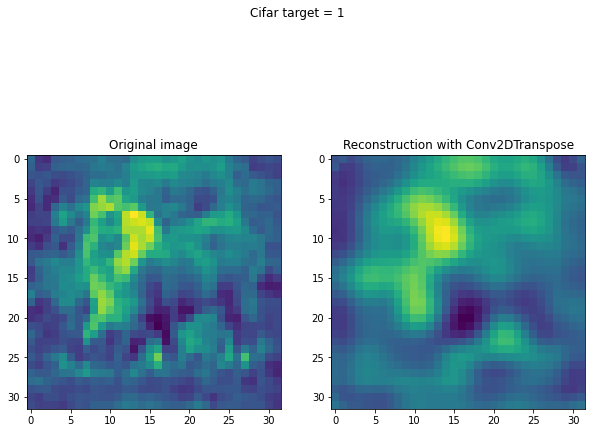

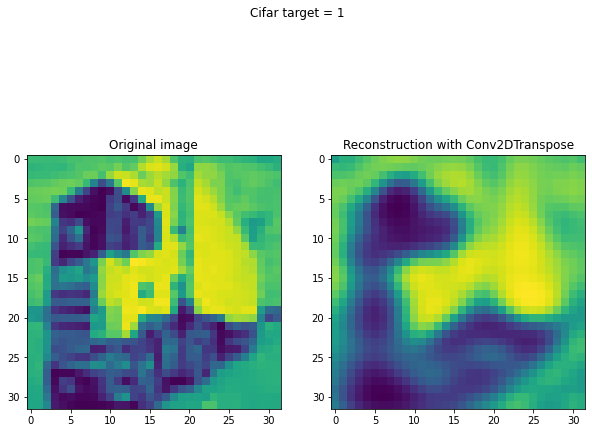

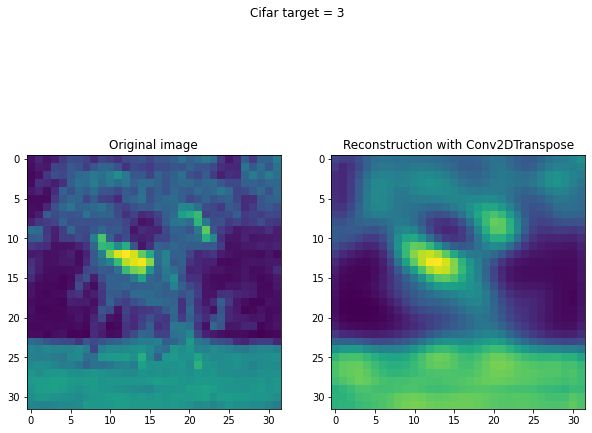

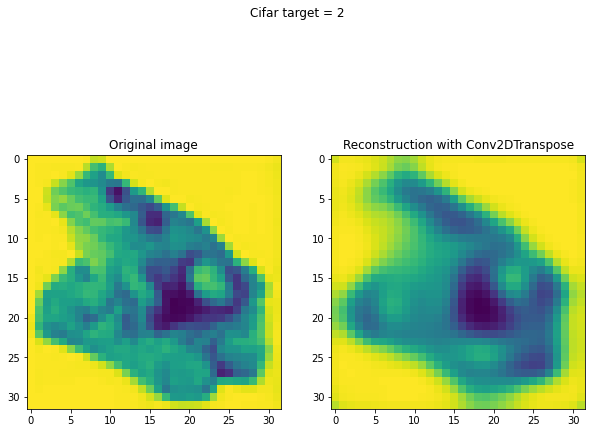

In [22]:
for i in np.arange(0, num_reconstructions):
  # Get the sample and the reconstruction
  sample = samples[i][:, :, 0]
  reconstruction = reconstructions[i][:, :, 0]
  input_class = targets[i]
  # Matplotlib preparations
  fig, axes = plt.subplots(1, 2)
  # Plot sample and reconstruciton
  axes[0].imshow(sample)
  axes[0].set_title('Original image')
  axes[1].imshow(reconstruction)
  axes[1].set_title('Reconstruction with Conv2DTranspose')
  fig.suptitle(f'Cifar target = {input_class}')
  plt.show()